In [3]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))



/var/folders/89/g9qfd5w53x7f75_j9jnrxvr00000gn/T/ipykernel_83645/3453545336.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from loguru import logger
import dataloader 
import numpy as np

In [46]:
import importlib

import tf_models  # First, import the library
importlib.reload(tf_models)  # Now, reload it


<module 'tf_models' from '/Users/ziliangpeng/code/naoshima/ml/objcla/tf_models.py'>

In [38]:
import dataloader

dataset = "mnist"

loader = getattr(dataloader, f"load_{dataset}")
x_train, y_train, x_test, y_test = loader(onehot=True)

logger.info(x_train.shape)
logger.info(x_test.shape)
if x_train[0].ndim == 2:
    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]
image_shape = x_train[0].shape
logger.info(f"image shape: {image_shape}")

2023-10-01 19:30:18.908 | INFO     | dataloader:_load_keras:30 - Using mnist dataset
2023-10-01 19:30:18.909 | INFO     | dataloader:_load_keras:33 - The size is 60000
2023-10-01 19:30:18.909 | INFO     | dataloader:_load_keras:34 - The shape is: (28, 28)
2023-10-01 19:30:19.037 | INFO     | __main__:<module>:8 - (60000, 28, 28)
2023-10-01 19:30:19.038 | INFO     | __main__:<module>:9 - (10000, 28, 28)
2023-10-01 19:30:19.038 | INFO     | __main__:<module>:14 - image shape: (28, 28, 1)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
import dataloader

from tf_models import *

model = AlexNet(image_shape, num_classes=y_train.shape[1])

model.compile(
    optimizer="adam", loss=CategoricalCrossentropy(), metrics=["accuracy"]
)


In [40]:
with tf.device("/GPU:0"):
    history = model.fit(
        x_train, y_train, epochs=3, batch_size=64, validation_split=0.2
    )
# Evaluate the model on the test set
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test loss: {loss:.4f}")
# print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/3
750/750 [==============================] - 62s 80ms/step - loss: 59.6511 - accuracy: 0.8487 - val_loss: 113.9214 - val_accuracy: 0.9710
Epoch 2/3
750/750 [==============================] - 70s 93ms/step - loss: 258.2170 - accuracy: 0.9654 - val_loss: 210.5827 - val_accuracy: 0.9787
Epoch 3/3
750/750 [==============================] - 90s 120ms/step - loss: 245.1684 - accuracy: 0.9809 - val_loss: 247.2120 - val_accuracy: 0.9820


In [53]:
model.save('viz.keras')

In [10]:
model.load_weights('viz.keras')

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

from time import time

def viz_1d(o, canvas=plt):
    canvas.imshow(o.numpy(), cmap='gray', aspect=o.shape[1]/10)
    
def viz_3d(o, convas=plt):
    st = time()
    n_fea = o.shape[2]
    row_w = int(math.sqrt(n_fea))
    rows = []
    empt_mat = np.zeros((o.shape[0], o.shape[1]))
    for stitch_i in range(math.ceil(n_fea / row_w)):
        ret_mat = o[:,:,stitch_i*row_w]
        for stitch_j in range(1,row_w):
            idx = stitch_i*row_w + stitch_j
            if idx < n_fea:
                cur_mat = o[:,:,stitch_i*row_w + stitch_j]
            else:
                cur_mat = empt_mat
            ret_mat = np.concatenate((ret_mat, cur_mat), axis=1)
        rows.append(ret_mat)
        
    ret_mat = rows[0]
    for r in rows[1:]:
        ret_mat = np.concatenate((ret_mat, r), axis=0)
    convas.imshow(ret_mat) #, cmap='gray')
    et = time()
    #print(f"time of viz3d: {et-st}")

def vizn_1d(o):
    n = len(o)
    fig, axs = plt.subplots(n, 1, figsize=(10, 5))
    for i in range(n):
        viz_1d(o[i:i+1,:], axs[i])
        axs[i].axis('off')
    plt.show()
    
def vizn_3d(o):
    st = time()
    n = len(o)
    fig, axs = plt.subplots(1, n, figsize=(10, 5))
    for i in range(n):
        #viz_3d(o[i:i+1,:,:,:], axs[i])
        viz_3d(o[i], axs[i])
        axs[i].axis('off')
    plt.show()
    #print(f"time of vizn3d: {time()-st}")

    

In [103]:
# find the right index for category X
from collections import defaultdict
import random

m = defaultdict(list)
for i, y in enumerate(y_train):
    y = np.argmax(y)
    m[y].append(i)
    
for i in range(10):
    print(i, random.sample(m[i], 3))

0 [7948, 38993, 35994]
1 [638, 33025, 37305]
2 [19606, 57007, 12426]
3 [26364, 17632, 40940]
4 [21246, 33894, 30763]
5 [51283, 5685, 16956]
6 [7298, 18771, 30350]
7 [47062, 19433, 59638]
8 [7799, 55268, 615]
9 [38247, 34031, 51095]


[<Axes: > <Axes: > <Axes: > <Axes: >]


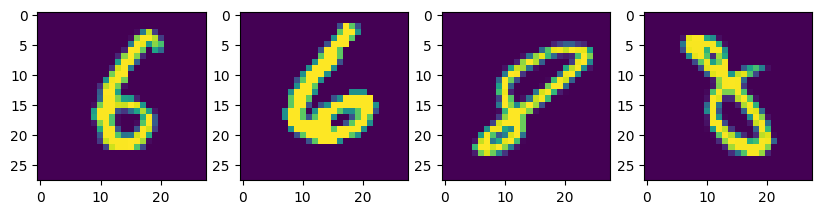

2023-10-01 20:46:19.776 | INFO     | __main__:<module>:25 - (4, 28, 28, 96)
2023-10-01 20:46:19.776 | INFO     | __main__:<module>:26 - conv2d_5


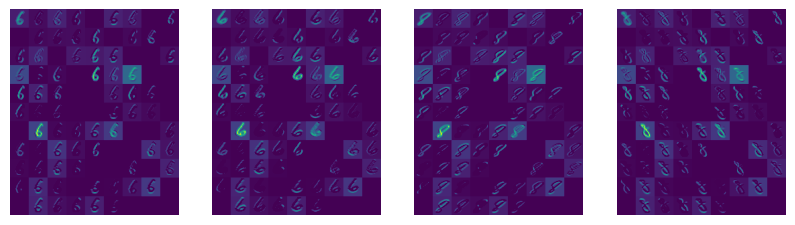

2023-10-01 20:46:20.064 | INFO     | __main__:<module>:25 - (4, 28, 28, 96)
2023-10-01 20:46:20.065 | INFO     | __main__:<module>:26 - batch_normalization_5


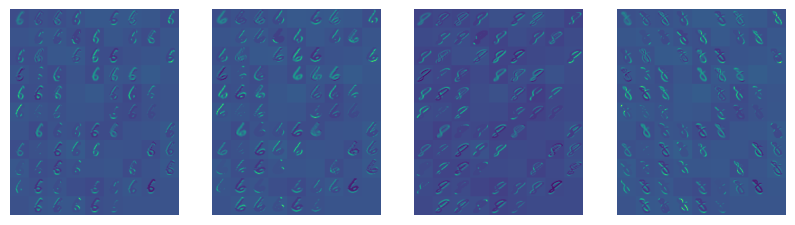

2023-10-01 20:46:20.333 | INFO     | __main__:<module>:25 - (4, 14, 14, 96)
2023-10-01 20:46:20.333 | INFO     | __main__:<module>:26 - max_pooling2d_3


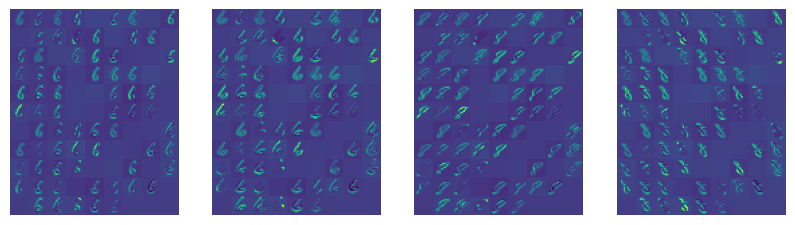

2023-10-01 20:46:20.644 | INFO     | __main__:<module>:25 - (4, 14, 14, 256)
2023-10-01 20:46:20.644 | INFO     | __main__:<module>:26 - conv2d_6


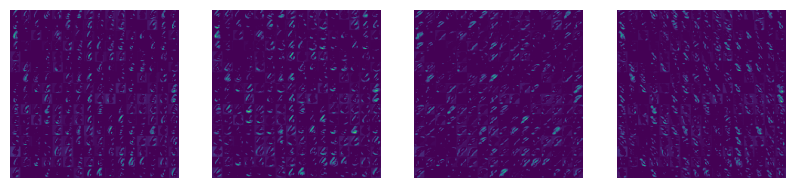

2023-10-01 20:46:21.780 | INFO     | __main__:<module>:25 - (4, 14, 14, 256)
2023-10-01 20:46:21.781 | INFO     | __main__:<module>:26 - batch_normalization_6


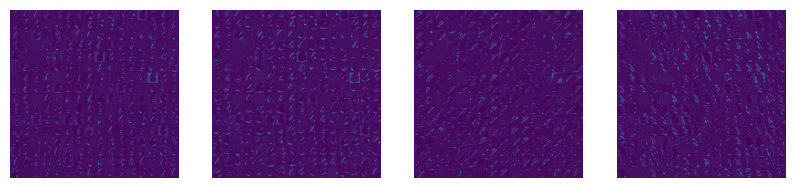

2023-10-01 20:46:22.533 | INFO     | __main__:<module>:25 - (4, 7, 7, 256)
2023-10-01 20:46:22.534 | INFO     | __main__:<module>:26 - max_pooling2d_4


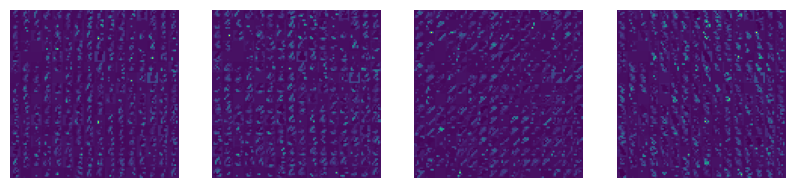

2023-10-01 20:46:23.201 | INFO     | __main__:<module>:25 - (4, 7, 7, 384)
2023-10-01 20:46:23.201 | INFO     | __main__:<module>:26 - conv2d_7


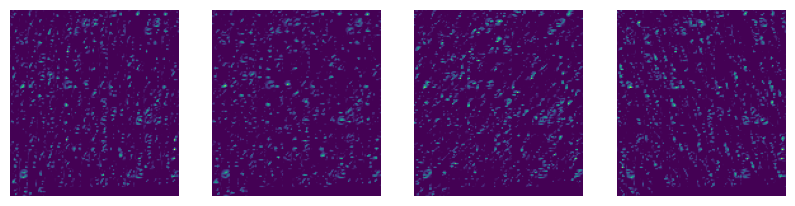

2023-10-01 20:46:24.167 | INFO     | __main__:<module>:25 - (4, 7, 7, 384)
2023-10-01 20:46:24.167 | INFO     | __main__:<module>:26 - batch_normalization_7


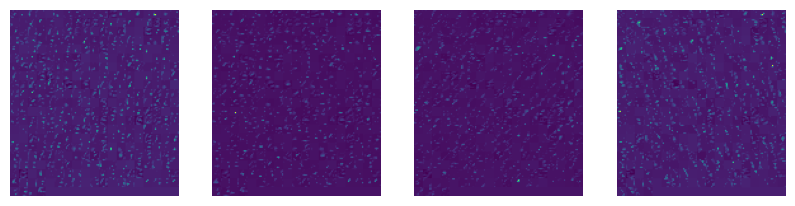

2023-10-01 20:46:25.161 | INFO     | __main__:<module>:25 - (4, 7, 7, 384)
2023-10-01 20:46:25.162 | INFO     | __main__:<module>:26 - conv2d_8


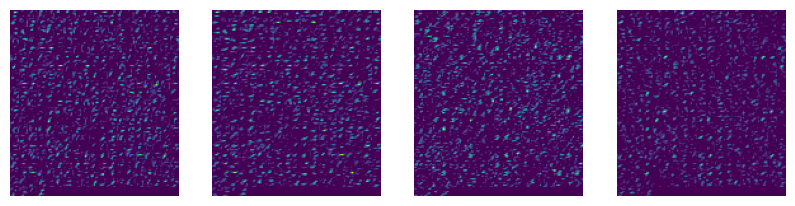

2023-10-01 20:46:26.108 | INFO     | __main__:<module>:25 - (4, 7, 7, 384)
2023-10-01 20:46:26.110 | INFO     | __main__:<module>:26 - batch_normalization_8


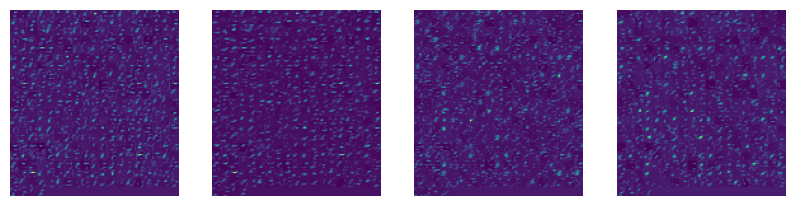

2023-10-01 20:46:27.085 | INFO     | __main__:<module>:25 - (4, 7, 7, 256)
2023-10-01 20:46:27.085 | INFO     | __main__:<module>:26 - conv2d_9


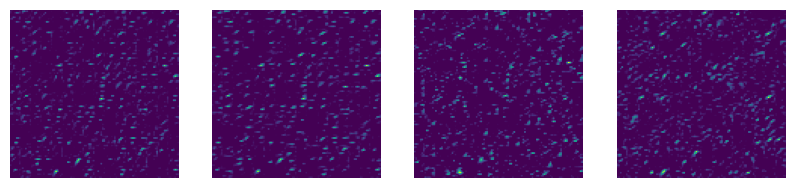

2023-10-01 20:46:27.757 | INFO     | __main__:<module>:25 - (4, 7, 7, 256)
2023-10-01 20:46:27.757 | INFO     | __main__:<module>:26 - batch_normalization_9


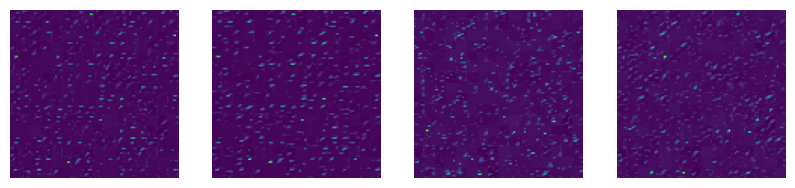

2023-10-01 20:46:28.388 | INFO     | __main__:<module>:25 - (4, 3, 3, 256)
2023-10-01 20:46:28.389 | INFO     | __main__:<module>:26 - max_pooling2d_5


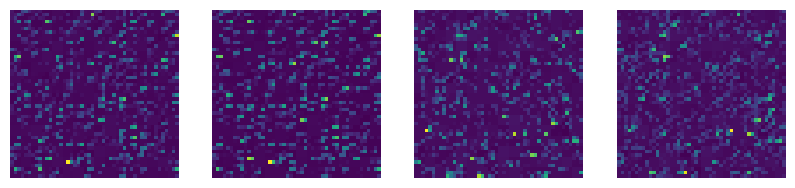

2023-10-01 20:46:29.071 | INFO     | __main__:<module>:25 - (4, 2304)
2023-10-01 20:46:29.071 | INFO     | __main__:<module>:26 - flatten_1


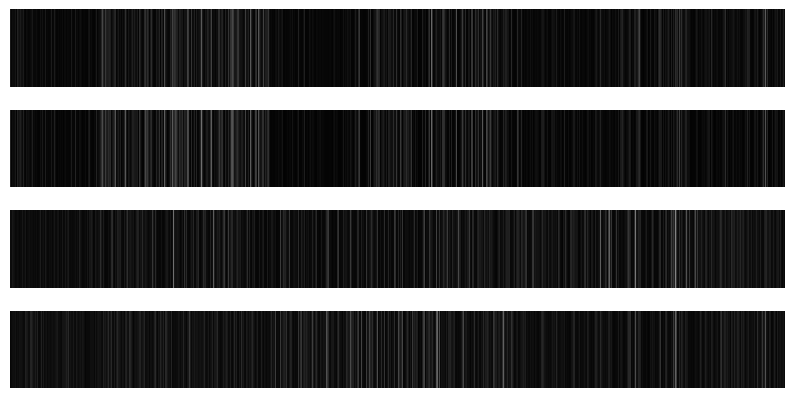

2023-10-01 20:46:29.138 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-01 20:46:29.139 | INFO     | __main__:<module>:26 - dense_3


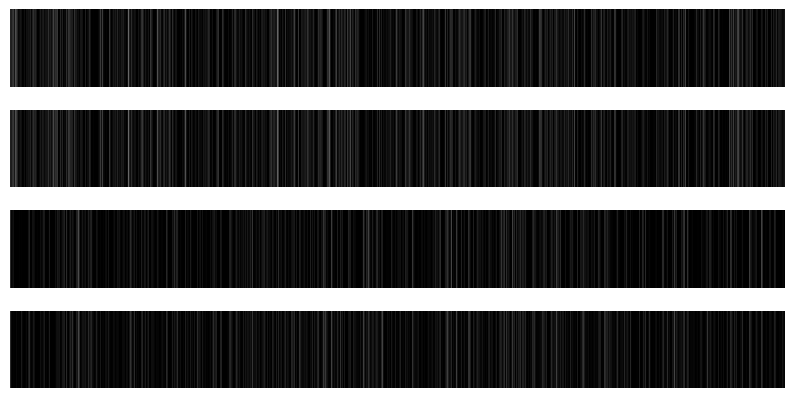

2023-10-01 20:46:29.229 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-01 20:46:29.229 | INFO     | __main__:<module>:26 - dropout_2


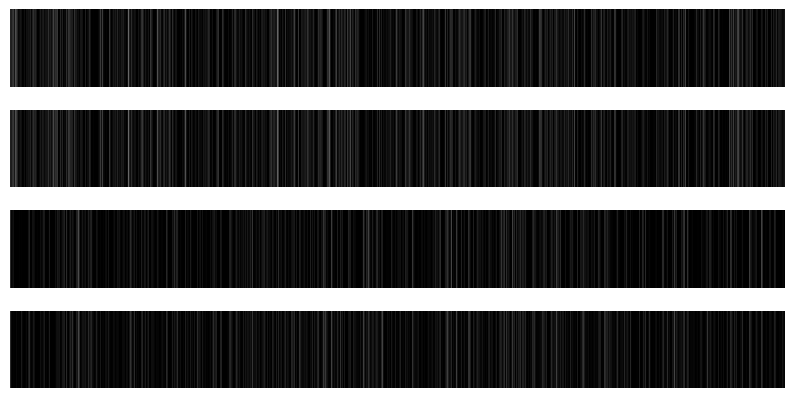

2023-10-01 20:46:29.306 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-01 20:46:29.306 | INFO     | __main__:<module>:26 - dense_4


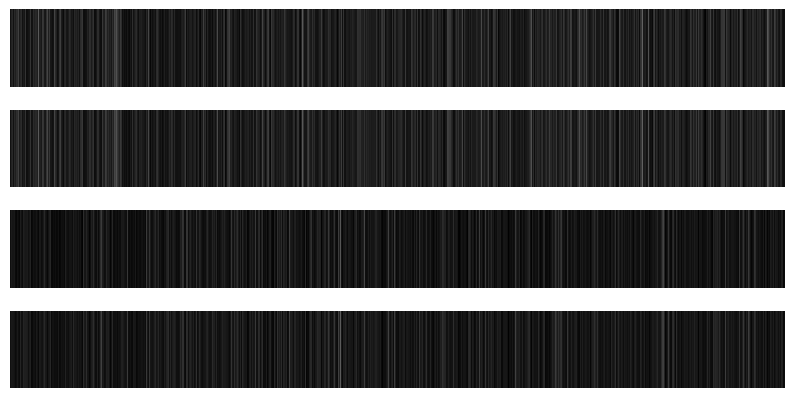

2023-10-01 20:46:29.399 | INFO     | __main__:<module>:25 - (4, 4096)
2023-10-01 20:46:29.399 | INFO     | __main__:<module>:26 - dropout_3


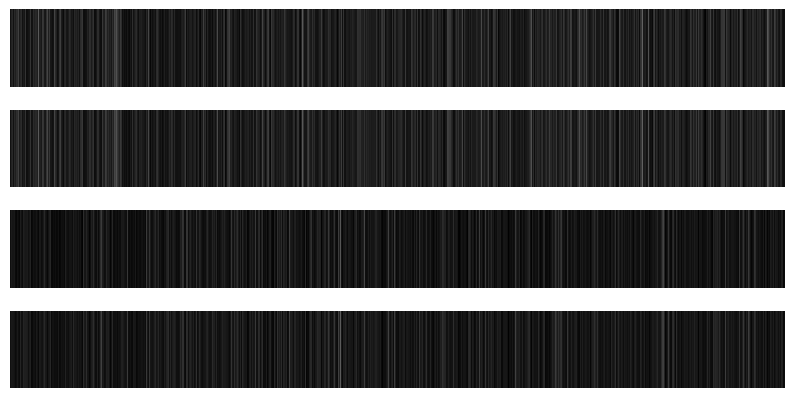

2023-10-01 20:46:29.474 | INFO     | __main__:<module>:25 - (4, 10)
2023-10-01 20:46:29.474 | INFO     | __main__:<module>:26 - dense_5


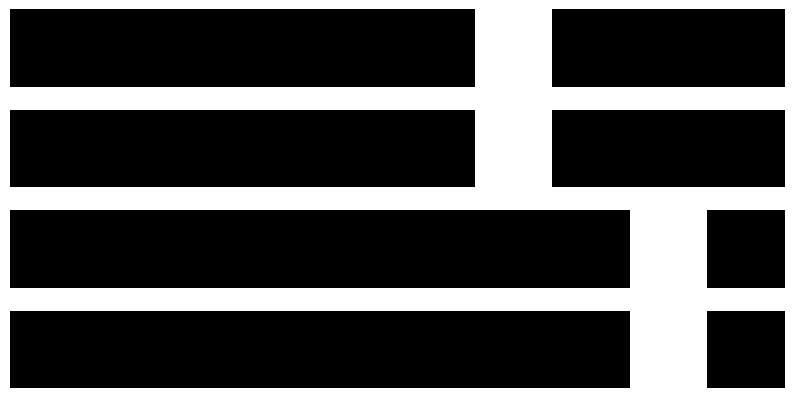

2023-10-01 20:46:29.528 | INFO     | __main__:<module>:32 - tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(4, 10), dtype=float32)
2023-10-01 20:46:29.530 | INFO     | __main__:<module>:34 - 6
2023-10-01 20:46:29.530 | INFO     | __main__:<module>:35 - 6


In [108]:
# CNN viz
import math
# from viz import viz_1d, viz_3d


img_index = [7298,18771,7799,55268]
n = len(img_index)

img = x_train[img_index]
label = y_train[img_index]
input = x_train[img_index]

fig, imgxs = plt.subplots(1, n, figsize=(10, 5))
print(imgxs)
for i in range(n):
    imgxs[i].imshow(img[i], cmap='viridis')
plt.show()

ls = model.layers
os = []
o = input
for l in ls:
    o = l(o)
    os.append(o)
    logger.info(o.shape)
    logger.info(l.name)
    if o.ndim == 2:
        vizn_1d(o)
    if o.ndim == 4:
        vizn_3d(o)
        pass
logger.info(o)

logger.info(np.argmax(label))
logger.info(np.argmax(o))